In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame = False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape,y.shape)

(70000, 784) (70000,)


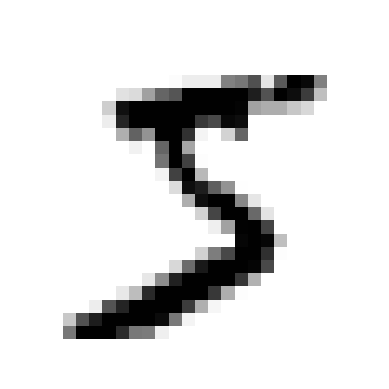

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image=some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [4]:
y[0]

'5'

In [13]:
X_train, X_test, y_train, y_test = X[:600000], X[600000:], y[:600000], y[600000:]

In [18]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict([some_digit])

array([ True])

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
# 自己实现的K折交叉验证
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9685866118110911
0.9315561650880727
0.9431277589679853


In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96794377, 0.94797069, 0.96194231])

In [26]:
from sklearn.base import BaseEstimator
import numpy as np
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [27]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91137396, 0.9087987 , 0.90927013])

In [28]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix
"""
[[正确分为非5，错误分成了5] -->所有的非5图片,
[错误分成了非5， 正确分为了5] -->所有的5图片]
"""
confusion_matrix(y_train_5, y_train_pred)

array([[61910,  1777],
       [ 1073,  5240]], dtype=int64)

In [31]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7467578737352145

In [32]:
recall_score(y_train_5, y_train_pred)

0.8300332646919056

In [33]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7861965491372844

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

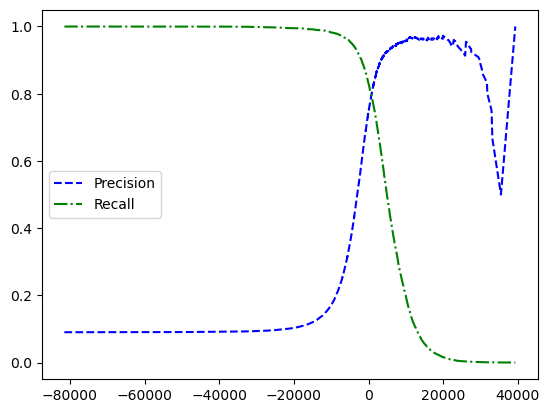

In [42]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-.", label="Recall")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.legend()
plt.show()